In [1]:

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
# Se normaliza porque es mejor procesarlas en blanco y negro a colores
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data to include a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build the convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling
    # agarra pedazos de 2x2 y va agarrar el maximo
    # Reduccion de imagen de 512*512=256*256 la mitad
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten
    # Lo convierte en una matriz unidimensiona;
    layers.Flatten(),
    # si no tuviese esto, no h sirve
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              # Funcion de perdida
              # Aquella que le va permitir al modelo saber si se esta entrenando bien o no
              # La mas sencilla es el error
              # Hay muchas
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=5,
                    # la validacion, se agarra un pedazo para la evaluacion
                    # DE 50000 datos, toma 10k para validar
                    # Cada vez que acaba una epoca, obtiene el accuracy y la validaciobn
                    # Durante el entrenamiento observes si accuracy y val acuraccy van parecidos

                    validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8922 - loss: 0.3436 - val_accuracy: 0.9818 - val_loss: 0.0570
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9871 - val_loss: 0.0413
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9901 - loss: 0.0306 - val_accuracy: 0.9894 - val_loss: 0.0350
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 37ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9931 - val_loss: 0.0272


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 - 3s - 8ms/step - accuracy: 0.9931 - loss: 0.0272

Test accuracy: 0.99


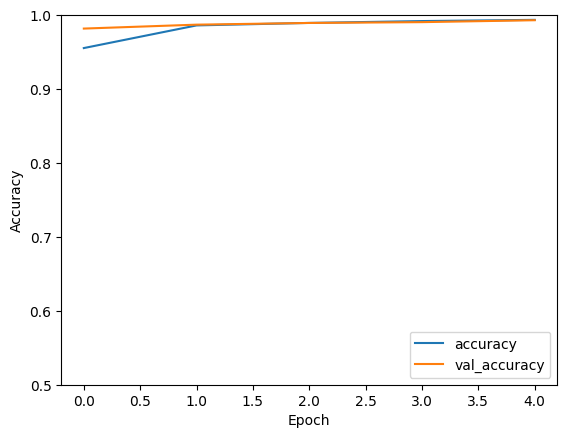

In [8]:

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
